# **Financial Management System:**

The Financial Management System is a software that is used to check the
authenticity of a particular transaction in a financial company.


Importing the required libraries

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
df_1= pd.read_csv('/content/drive/MyDrive/AIML_Dataset.csv')
df_1.head()   #reading the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df_1.shape  #all loaded into google drive

(6362620, 11)

In [9]:
df_1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df_1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values detected.

# **EDA - Exploratory Data Analysis**

In [13]:
df_1.type.value_counts()   # counting the five different types of transfers

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
df_1.isFraud.value_counts()  

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
df_1.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Only in 16 cases, IsFlaggedFraud is set to 1 i.e. 16 is **0.00025%** of 6362620. Thus it's insignificant for our analysis and has to be eliminated.

In [20]:
df_1.drop('isFlaggedFraud',inplace=True, axis=1)

In [21]:
df_1.groupby(['type', 'isFraud']).count()

step   amount  ...  oldbalanceDest  newbalanceDest
type     isFraud                    ...                                
CASH_IN  0        1399284  1399284  ...         1399284         1399284
CASH_OUT 0        2233384  2233384  ...         2233384         2233384
         1           4116     4116  ...            4116            4116
DEBIT    0          41432    41432  ...           41432           41432
PAYMENT  0        2151495  2151495  ...         2151495         2151495
TRANSFER 0         528812   528812  ...          528812          528812
         1           4097     4097  ...            4097            4097

[7 rows x 8 columns]

Cash out and transfer have shown signs of fraud occurence.

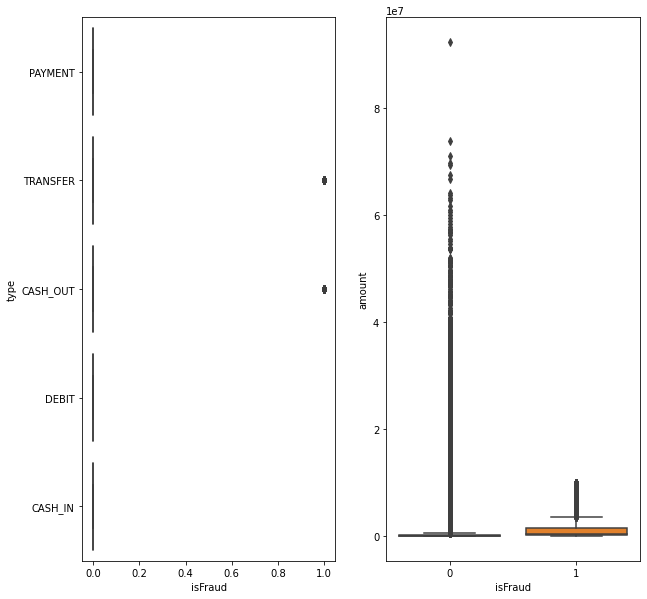

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'isFraud', y = 'type', data =df_1 )
plt.subplot(1,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df_1)
plt.show()

Median of isFraud=1 is higher in amount category than isFraud=0. 
Also the box plot for type clearly shows fraud occuring in only CASH_OUT and TRANSFER.
